In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

I'm working through the content at http://pandas.pydata.org/pandas-docs/stable/10min.html, for muscle memory. In addition to the stuff I've entered below, the content at the link above also has a bunch of links to more details.

#Object creation

In [3]:
s = pd.Series([1,2,3,np.nan,6,8])
s

0     1
1     2
2     3
3   NaN
4     6
5     8
dtype: float64

In [4]:
type(s)

pandas.core.series.Series

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [6]:
type(dates)

pandas.tseries.index.DatetimeIndex

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.876792,-1.190306,-0.616312,0.323484
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-03,-0.391428,-1.085061,1.450830,0.267916
2013-01-04,-0.918835,-0.405640,0.079808,2.105945
2013-01-05,0.707847,1.177142,0.886338,-0.581201
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411


In [8]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [9]:
d = { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : pd.Categorical(["test","train","test","train"]),
      'F' : 'foo' }

In [10]:
d

{'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 0    1
 1    1
 2    1
 3    1
 dtype: float32, 'D': array([3, 3, 3, 3], dtype=int32), 'E': [test, train, test, train]
 Categories (2, object): [test, train], 'F': 'foo'}

In [11]:
d['E']

[test, train, test, train]
Categories (2, object): [test, train]

In [12]:
df2 = pd.DataFrame(d)
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#Viewing data

In [14]:
df.head()

,A,B,C,D
2013-01-01,-1.876792,-1.190306,-0.616312,0.323484
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-03,-0.391428,-1.085061,1.450830,0.267916
2013-01-04,-0.918835,-0.405640,0.079808,2.105945
2013-01-05,0.707847,1.177142,0.886338,-0.581201


In [15]:
df.tail()

,A,B,C,D
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-03,-0.391428,-1.085061,1.450830,0.267916
2013-01-04,-0.918835,-0.405640,0.079808,2.105945
2013-01-05,0.707847,1.177142,0.886338,-0.581201
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411


In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-1.87679172, -1.19030588, -0.61631201,  0.32348396],
       [ 1.36813637,  0.29111868,  0.59689659, -0.0514374 ],
       [-0.39142752, -1.08506071,  1.45082968,  0.26791609],
       [-0.91883476, -0.40563974,  0.07980842,  2.10594484],
       [ 0.70784652,  1.17714247,  0.8863377 , -0.58120054],
       [-0.60023079,  0.52382855, -0.59452454, -0.34441131]])

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.285217,-0.114819,0.300506,0.286716
std,1.163172,0.940685,0.830016,0.956791
min,-1.876792,-1.190306,-0.616312,-0.581201
25%,-0.839184,-0.915205,-0.425941,-0.271168
50%,-0.495829,-0.057261,0.338353,0.108239
75%,0.433028,0.465651,0.813977,0.309592
max,1.368136,1.177142,1.450830,2.105945


In [20]:
df['A']

2013-01-01   -1.876792
2013-01-02    1.368136
2013-01-03   -0.391428
2013-01-04   -0.918835
2013-01-05    0.707847
2013-01-06   -0.600231
Freq: D, Name: A, dtype: float64

In [21]:
df.A.median()

-0.4958291570113459

In [22]:
(df.A[2] + df.A[3])/2

-0.65513114089638136

In [23]:
sorted(df.A)

[-1.8767917169522546,
 -0.9188347571455503,
 -0.60023078937547936,
 -0.39142752464721237,
 0.70784651724289926,
 1.3681363704344929]

In [24]:
(sorted(df.A)[2] + sorted(df.A)[3])/2

-0.49582915701134589

Transpose

In [25]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.876792,1.368136,-0.391428,-0.918835,0.707847,-0.600231
B,-1.190306,0.291119,-1.085061,-0.405640,1.177142,0.523829
C,-0.616312,0.596897,1.450830,0.079808,0.886338,-0.594525
D,0.323484,-0.051437,0.267916,2.105945,-0.581201,-0.344411


Sort by an axis - I think this means here sort the actual column headers?

In [26]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.323484,-0.616312,-1.190306,-1.876792
2013-01-02,-0.051437,0.596897,0.291119,1.368136
2013-01-03,0.267916,1.450830,-1.085061,-0.391428
2013-01-04,2.105945,0.079808,-0.405640,-0.918835
2013-01-05,-0.581201,0.886338,1.177142,0.707847
2013-01-06,-0.344411,-0.594525,0.523829,-0.600231


Sort by the values (in a particular column)

In [27]:
df.sort(columns='B')

,A,B,C,D
2013-01-01,-1.876792,-1.190306,-0.616312,0.323484
2013-01-03,-0.391428,-1.085061,1.450830,0.267916
2013-01-04,-0.918835,-0.405640,0.079808,2.105945
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411
2013-01-05,0.707847,1.177142,0.886338,-0.581201


#Selection

The doc says "standard Python/Numpy select/setting expressions are intuitive and come in handy for interactive work, for production code, [they] recommend the optimized Pandas data access methods, .at, .iat, .loc, .iloc, and .ix".

##Getting

In [28]:
df['A']

2013-01-01   -1.876792
2013-01-02    1.368136
2013-01-03   -0.391428
2013-01-04   -0.918835
2013-01-05    0.707847
2013-01-06   -0.600231
Freq: D, Name: A, dtype: float64

In [29]:
df.A


2013-01-01   -1.876792
2013-01-02    1.368136
2013-01-03   -0.391428
2013-01-04   -0.918835
2013-01-05    0.707847
2013-01-06   -0.600231
Freq: D, Name: A, dtype: float64

In [30]:
df[0:3]

,A,B,C,D
2013-01-01,-1.876792,-1.190306,-0.616312,0.323484
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-03,-0.391428,-1.085061,1.450830,0.267916


In [31]:
df[1:2]

,A,B,C,D
2013-01-02,1.368136,0.291119,0.596897,-0.051437


In [32]:
df[2:2]

,A,B,C,D


In [33]:
df[3:]

,A,B,C,D
2013-01-04,-0.918835,-0.405640,0.079808,2.105945
2013-01-05,0.707847,1.177142,0.886338,-0.581201
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411


In [34]:
df[:2]

,A,B,C,D
2013-01-01,-1.876792,-1.190306,-0.616312,0.323484
2013-01-02,1.368136,0.291119,0.596897,-0.051437


In [35]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-03,-0.391428,-1.085061,1.450830,0.267916
2013-01-04,-0.918835,-0.405640,0.079808,2.105945


##Selection by label

In [36]:
df.loc['20130101']

A   -1.876792
B   -1.190306
C   -0.616312
D    0.323484
Name: 2013-01-01 00:00:00, dtype: float64

In [37]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.876792,-1.190306
2013-01-02,1.368136,0.291119
2013-01-03,-0.391428,-1.085061
2013-01-04,-0.918835,-0.405640
2013-01-05,0.707847,1.177142
2013-01-06,-0.600231,0.523829


With slicing - 'label slicing' - both endpoints are included.

In [38]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.368136,0.291119
2013-01-03,-0.391428,-1.085061
2013-01-04,-0.918835,-0.405640


In [39]:
df.loc['20130102',['A','B']]

A    1.368136
B    0.291119
Name: 2013-01-02 00:00:00, dtype: float64

In [40]:
type(df.loc['20130102',['A','B']])

pandas.core.series.Series

In [41]:
df.loc['20130101','A']

-1.8767917169522546

Same as previous method - get a scalar value.

In [42]:
df.at[dates[0],'A']

-1.8767917169522546

In [43]:
dates[0]

Timestamp('2013-01-01 00:00:00', offset='D')

In [44]:
pd.Timestamp('20130101')

Timestamp('2013-01-01 00:00:00')

In [45]:
df.at[pd.Timestamp('20130101'),'A']

-1.8767917169522546

##Selection by position

In [46]:
type(df.iloc[3])

pandas.core.series.Series

In [47]:
df.iloc[3]

A   -0.918835
B   -0.405640
C    0.079808
D    2.105945
Name: 2013-01-04 00:00:00, dtype: float64

Previous is same as Numpy/Python indexing, like the following. Seems like the former returns a Series, while the latter returns a DataFrame.

In [48]:
df[3:4]

,A,B,C,D
2013-01-04,-0.918835,-0.40564,0.079808,2.105945


In [49]:
type(df[3:4])

pandas.core.frame.DataFrame

In [50]:
df.iloc[3:5]

,A,B,C,D
2013-01-04,-0.918835,-0.405640,0.079808,2.105945
2013-01-05,0.707847,1.177142,0.886338,-0.581201


In [51]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.918835,-0.405640
2013-01-05,0.707847,1.177142


In [52]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.368136,0.596897
2013-01-03,-0.391428,1.450830
2013-01-05,0.707847,0.886338


In [53]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-03,-0.391428,-1.085061,1.450830,0.267916


In [54]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.190306,-0.616312
2013-01-02,0.291119,0.596897
2013-01-03,-1.085061,1.450830
2013-01-04,-0.405640,0.079808
2013-01-05,1.177142,0.886338
2013-01-06,0.523829,-0.594525


In [55]:
df.iloc[1,1]

0.29111867700270222

Fast access - same result as previous.

In [56]:
df.iat[1,1]

0.29111867700270222

##Boolean indexing

In [57]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.368136,0.291119,0.596897,-0.051437
2013-01-05,0.707847,1.177142,0.886338,-0.581201


In [58]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.323484
2013-01-02,1.368136,0.291119,0.596897,NaN
2013-01-03,NaN,NaN,1.450830,0.267916
2013-01-04,NaN,NaN,0.079808,2.105945
2013-01-05,0.707847,1.177142,0.886338,NaN
2013-01-06,NaN,0.523829,NaN,NaN


In [59]:
dfcopy = df.copy()
dfcopy['E'] = ['one','one','two','three','four','three']
dfcopy

,A,B,C,D,E
2013-01-01,-1.876792,-1.190306,-0.616312,0.323484,one
2013-01-02,1.368136,0.291119,0.596897,-0.051437,one
2013-01-03,-0.391428,-1.085061,1.450830,0.267916,two
2013-01-04,-0.918835,-0.405640,0.079808,2.105945,three
2013-01-05,0.707847,1.177142,0.886338,-0.581201,four
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411,three


In [60]:
dfcopy[dfcopy['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.391428,-1.085061,1.450830,0.267916,two
2013-01-05,0.707847,1.177142,0.886338,-0.581201,four


##Setting

In [61]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [62]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-1.876792,-1.190306,-0.616312,0.323484,NaN
2013-01-02,1.368136,0.291119,0.596897,-0.051437,1
2013-01-03,-0.391428,-1.085061,1.450830,0.267916,2
2013-01-04,-0.918835,-0.405640,0.079808,2.105945,3
2013-01-05,0.707847,1.177142,0.886338,-0.581201,4
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411,5


In [63]:
df.at[pd.Timestamp('20130101'),'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-1.190306,-0.616312,0.323484,NaN
2013-01-02,1.368136,0.291119,0.596897,-0.051437,1
2013-01-03,-0.391428,-1.085061,1.450830,0.267916,2
2013-01-04,-0.918835,-0.405640,0.079808,2.105945,3
2013-01-05,0.707847,1.177142,0.886338,-0.581201,4
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411,5


In [64]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.616312,0.323484,NaN
2013-01-02,1.368136,0.291119,0.596897,-0.051437,1
2013-01-03,-0.391428,-1.085061,1.450830,0.267916,2
2013-01-04,-0.918835,-0.405640,0.079808,2.105945,3
2013-01-05,0.707847,1.177142,0.886338,-0.581201,4
2013-01-06,-0.600231,0.523829,-0.594525,-0.344411,5


In [65]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.616312,5,NaN
2013-01-02,1.368136,0.291119,0.596897,5,1
2013-01-03,-0.391428,-1.085061,1.450830,5,2
2013-01-04,-0.918835,-0.405640,0.079808,5,3
2013-01-05,0.707847,1.177142,0.886338,5,4
2013-01-06,-0.600231,0.523829,-0.594525,5,5


In [66]:
dfcopy2 = df.copy()
dfcopy2[dfcopy2 > 0] = -dfcopy2
dfcopy2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.616312,-5,NaN
2013-01-02,-1.368136,-0.291119,-0.596897,-5,-1
2013-01-03,-0.391428,-1.085061,-1.450830,-5,-2
2013-01-04,-0.918835,-0.405640,-0.079808,-5,-3
2013-01-05,-0.707847,-1.177142,-0.886338,-5,-4
2013-01-06,-0.600231,-0.523829,-0.594525,-5,-5


#Missing data

In [67]:
dfcopy1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
dfcopy1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.616312,5,NaN,NaN
2013-01-02,1.368136,0.291119,0.596897,5,1,NaN
2013-01-03,-0.391428,-1.085061,1.450830,5,2,NaN
2013-01-04,-0.918835,-0.405640,0.079808,5,3,NaN


In [68]:
dfcopy1.loc[dates[0]:dates[1],'E'] = 1
dfcopy1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.616312,5,NaN,1
2013-01-02,1.368136,0.291119,0.596897,5,1,1
2013-01-03,-0.391428,-1.085061,1.450830,5,2,NaN
2013-01-04,-0.918835,-0.405640,0.079808,5,3,NaN


In [69]:
dfcopy1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.368136,0.291119,0.596897,5,1,1


In [70]:
dfcopy1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.616312,5,NaN,1
2013-01-02,1.368136,0.291119,0.596897,5,1,1
2013-01-03,-0.391428,-1.085061,1.450830,5,2,NaN
2013-01-04,-0.918835,-0.405640,0.079808,5,3,NaN


In [71]:
dfcopy1.fillna(value=17)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.616312,5,17,1
2013-01-02,1.368136,0.291119,0.596897,5,1,1
2013-01-03,-0.391428,-1.085061,1.450830,5,2,17
2013-01-04,-0.918835,-0.405640,0.079808,5,3,17


In [72]:
dfcopy1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.616312,5,NaN,1
2013-01-02,1.368136,0.291119,0.596897,5,1,1
2013-01-03,-0.391428,-1.085061,1.450830,5,2,NaN
2013-01-04,-0.918835,-0.405640,0.079808,5,3,NaN


To get the boolean mask where values are nan:

In [73]:
pd.isnull(dfcopy1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


#Operations

##Statistics

Don't forget that in general operations exclude missing data.

In [74]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.616312,5,NaN
2013-01-02,1.368136,0.291119,0.596897,5,1
2013-01-03,-0.391428,-1.085061,1.450830,5,2
2013-01-04,-0.918835,-0.405640,0.079808,5,3
2013-01-05,0.707847,1.177142,0.886338,5,4
2013-01-06,-0.600231,0.523829,-0.594525,5,5


In [75]:
df.mean()

A    0.027582
B    0.083565
C    0.300506
D    5.000000
F    3.000000
dtype: float64

By default, it looks like mean works on columns, which I think are generally axis==0. To get the mean using the other axis - i.e., here the mean of all the numbers for a particular date/row, use axis==1.

In [76]:
df.mean(1)

2013-01-01    1.095922
2013-01-02    1.651230
2013-01-03    1.394868
2013-01-04    1.351067
2013-01-05    2.354265
2013-01-06    1.865815
Freq: D, dtype: float64

In [77]:
df.mean(axis=1)

2013-01-01    1.095922
2013-01-02    1.651230
2013-01-03    1.394868
2013-01-04    1.351067
2013-01-05    2.354265
2013-01-06    1.865815
Freq: D, dtype: float64

Pandas can work with objects that have different dimensionality and 'need alignment' (what does that mean?). In addition, Pandas 'automatically broadcasts along the specified dimension'.

In [78]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01     1
2013-01-02     3
2013-01-03     5
2013-01-04   NaN
2013-01-05     6
2013-01-06     8
Freq: D, dtype: float64

In [79]:
s = s.shift(2)
s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64

In [80]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.616312,5,NaN
2013-01-02,1.368136,0.291119,0.596897,5,1
2013-01-03,-0.391428,-1.085061,1.450830,5,2
2013-01-04,-0.918835,-0.405640,0.079808,5,3
2013-01-05,0.707847,1.177142,0.886338,5,4
2013-01-06,-0.600231,0.523829,-0.594525,5,5


DataFrame's sub method is a subtraction... it's equivalent to dataframe instance minus what's passed - here, a series. It looks like in this case the particular value is used for each column. So, for example, 20130101 is nan, which is used for each column - A to F - and since anything minus nan is nan, we see nan for each cell in the first row. In the third row, for example, '1' is used as the thing to subtract, for each column. -0.22-1 = -1.22 (column A), .26-1 = -.73 (column B), etc.

In [81]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.391428,-2.085061,0.450830,4,1
2013-01-04,-3.918835,-3.405640,-2.920192,2,0
2013-01-05,-4.292153,-3.822858,-4.113662,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


##Apply

Apply a particular function to the data... here, it looks like the function cumsum (cumulative sum) is applied individually to each series/column.

In [82]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.616312,5,NaN
2013-01-02,1.368136,0.291119,-0.019415,10,1
2013-01-03,0.976709,-0.793942,1.431414,15,3
2013-01-04,0.057874,-1.199582,1.511223,20,6
2013-01-05,0.765721,-0.022439,2.397560,25,10
2013-01-06,0.165490,0.501389,1.803036,30,15


Note that above we're using the NumPy cumsum method, not the DataFrame cumsum method (the latter might - ? - be what we'd actually use if trying to do something like this in the real world - it has an axis parameter that lets you do rows/indices or columns). The apply method has an axis method that defaults to '0'/'index' and says that the specified function will be applied to each column. You can also pass '1' to apply the function to each row. 

In [83]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.616312,4.383688,NaN
2013-01-02,1.368136,1.659255,2.256152,7.256152,8.256152
2013-01-03,-0.391428,-1.476488,-0.025659,4.974341,6.974341
2013-01-04,-0.918835,-1.324475,-1.244666,3.755334,6.755334
2013-01-05,0.707847,1.884989,2.771327,7.771327,11.771327
2013-01-06,-0.600231,-0.076402,-0.670927,4.329073,9.329073


So here, I think, we're passing the lambda we defined here a set of series, one for each column. The function then takes the max value of the series and subtracts the min value in the series.

In [84]:
df.apply(lambda x: x.max() - x.min())

A    2.286971
B    2.262203
C    2.067142
D    0.000000
F    4.000000
dtype: float64

##Histograms

In [85]:
s = pd.Series(np.random.randint(0, 7, size=15))
s

0     2
1     6
2     3
3     1
4     6
5     3
6     4
7     1
8     1
9     4
10    2
11    4
12    6
13    6
14    0
dtype: int64

In [86]:
s.value_counts

<bound method Series.value_counts of 0     2
1     6
2     3
3     1
4     6
5     3
6     4
7     1
8     1
9     4
10    2
11    4
12    6
13    6
14    0
dtype: int64>

##String methods

In [87]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [88]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

##Merge

###Concat

In [89]:
df1 = pd.DataFrame(np.random.randn(10,4))
df1

,0,1,2,3
0,-1.373295,-0.802554,0.678410,-0.890332
1,0.460893,-1.646584,-1.294322,0.222710
2,0.591357,0.928688,0.100017,-1.764617
3,0.304767,0.250560,1.000485,-0.607592
4,1.397945,-0.825406,0.237502,0.057968
5,-0.588162,-0.158998,0.207954,-1.313014
6,0.377938,0.019722,-1.134362,2.014138
7,0.672979,-1.178318,0.610978,0.141690
8,0.400565,1.987308,1.075460,-0.314689
9,-1.851984,-0.564761,0.674823,2.834252


In [90]:
pieces = [df1[:3], df1[3:7], df1[7:]]
pieces

[          0         1         2         3
 0 -1.373295 -0.802554  0.678410 -0.890332
 1  0.460893 -1.646584 -1.294322  0.222710
 2  0.591357  0.928688  0.100017 -1.764617,
           0         1         2         3
 3  0.304767  0.250560  1.000485 -0.607592
 4  1.397945 -0.825406  0.237502  0.057968
 5 -0.588162 -0.158998  0.207954 -1.313014
 6  0.377938  0.019722 -1.134362  2.014138,
           0         1         2         3
 7  0.672979 -1.178318  0.610978  0.141690
 8  0.400565  1.987308  1.075460 -0.314689
 9 -1.851984 -0.564761  0.674823  2.834252]

In [91]:
len(pieces)

3

In [92]:
pd.concat(pieces)

,0,1,2,3
0,-1.373295,-0.802554,0.678410,-0.890332
1,0.460893,-1.646584,-1.294322,0.222710
2,0.591357,0.928688,0.100017,-1.764617
3,0.304767,0.250560,1.000485,-0.607592
4,1.397945,-0.825406,0.237502,0.057968
5,-0.588162,-0.158998,0.207954,-1.313014
6,0.377938,0.019722,-1.134362,2.014138
7,0.672979,-1.178318,0.610978,0.141690
8,0.400565,1.987308,1.075460,-0.314689
9,-1.851984,-0.564761,0.674823,2.834252


###Join

In [93]:
left = pd.DataFrame({'key': ['foo','foo'],
                    'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo','foo'],
                     'rval': [4, 5]})

In [94]:
left

,key,lval
0,foo,1
1,foo,2


In [95]:
right

,key,rval
0,foo,4
1,foo,5


In [96]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


###Append

In [97]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.861867,0.777489,1.002133,-0.081073
1,-0.471884,-0.720935,1.246961,1.276933
2,0.712683,0.947691,0.631980,-0.935845
3,-0.065506,-0.020372,1.485747,-0.149099
4,0.224765,-0.881460,-0.097327,-1.992803
5,-0.707426,0.467510,0.491512,-0.019425
6,1.328283,-0.121555,-0.180332,-0.006234
7,-0.913059,0.170244,0.593922,1.354741


In [98]:
s = df.iloc[3]
s

A   -0.065506
B   -0.020372
C    1.485747
D   -0.149099
Name: 3, dtype: float64

In [99]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.861867,0.777489,1.002133,-0.081073
1,-0.471884,-0.720935,1.246961,1.276933
2,0.712683,0.947691,0.631980,-0.935845
3,-0.065506,-0.020372,1.485747,-0.149099
4,0.224765,-0.881460,-0.097327,-1.992803
5,-0.707426,0.467510,0.491512,-0.019425
6,1.328283,-0.121555,-0.180332,-0.006234
7,-0.913059,0.170244,0.593922,1.354741
8,-0.065506,-0.020372,1.485747,-0.149099


##Grouping

The doc's description of grouping is a process that involves one or more of these steps:
- splitting the data into groups based on some criteria
- applying a function to each group independently
- combining the results into a data structure

In [100]:
df = pd.DataFrame({'A': ['foo','bar','foo','bar',
                         'foo','bar','foo','foo'],
                   'B': ['one','one','two','three',
                         'two','two','one','three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.679174,0.430124
1,bar,one,1.418160,0.791115
2,foo,two,-1.259811,0.107622
3,bar,three,0.785695,-0.156778
4,foo,two,-0.190388,-0.591824
5,bar,two,0.939586,0.459733
6,foo,one,-0.119901,0.622415
7,foo,three,-0.166669,-1.064387


In [101]:
g = df.groupby('A').sum()
g

,C,D
A,,
bar,3.143441,1.09407
foo,-3.415942,-0.49605


In [102]:
type(g)

pandas.core.frame.DataFrame

"Grouping by multiple columns forms a hierarchical index," to "which we then apply the function".

In [103]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.418160  0.791115
    three  0.785695 -0.156778
    two    0.939586  0.459733
foo one   -1.799075  1.052538
    three -0.166669 -1.064387
    two   -1.450199 -0.484201

##Reshaping

###Stack

In [104]:
tuples = list(zip(*[['bar','bar','baz','baz',
                     'foo','foo','qux','qux'],
                    ['one','two','one','two',
                     'one','two','one','two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [105]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [106]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])
df

A         B
first second                    
bar   one     1.162994  0.482078
      two    -1.486666 -1.144588
baz   one    -0.996135  0.657748
      two    -1.363221 -1.254679
foo   one     0.804049  1.412090
      two    -0.294121  1.445125
qux   one     0.161527 -0.832068
      two    -1.733290 -0.273512

In [107]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.162994  0.482078
      two    -1.486666 -1.144588
baz   one    -0.996135  0.657748
      two    -1.363221 -1.254679

In [108]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.162994
               B    0.482078
       two     A   -1.486666
               B   -1.144588
baz    one     A   -0.996135
               B    0.657748
       two     A   -1.363221
               B   -1.254679
dtype: float64

In [109]:
stacked.unstack()

A         B
first second                    
bar   one     1.162994  0.482078
      two    -1.486666 -1.144588
baz   one    -0.996135  0.657748
      two    -1.363221 -1.254679

In [110]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.162994 -1.486666
      B  0.482078 -1.144588
baz   A -0.996135 -1.363221
      B  0.657748 -1.254679

In [111]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.162994 -0.996135
       B  0.482078  0.657748
two    A -1.486666 -1.363221
       B -1.144588 -1.254679

###Pivot tables

In [112]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.222917,-0.107839
1,one,B,foo,-0.003432,0.917473
2,two,C,foo,0.292959,-0.832011
3,three,A,bar,0.531000,-1.494908
4,one,B,bar,-0.128328,0.240137
5,one,C,bar,0.840452,-0.086194
6,two,A,foo,-0.341287,-0.255734
7,three,B,foo,1.281202,0.472724
8,one,C,foo,-0.254304,-0.544064
9,one,A,bar,1.724688,-0.043747


In [113]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.724688  0.222917
      B -0.128328 -0.003432
      C  0.840452 -0.254304
three A  0.531000       NaN
      B       NaN  1.281202
      C  1.560408       NaN
two   A       NaN -0.341287
      B -0.263148       NaN
      C       NaN  0.292959

##Time series

In [114]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [115]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    343
2012-01-01 00:00:01    196
2012-01-01 00:00:02    259
2012-01-01 00:00:03     24
2012-01-01 00:00:04     46
2012-01-01 00:00:05      8
2012-01-01 00:00:06    256
2012-01-01 00:00:07     42
2012-01-01 00:00:08    429
2012-01-01 00:00:09    338
2012-01-01 00:00:10    197
2012-01-01 00:00:11    166
2012-01-01 00:00:12    163
2012-01-01 00:00:13     75
2012-01-01 00:00:14    196
2012-01-01 00:00:15    266
2012-01-01 00:00:16    249
2012-01-01 00:00:17    431
2012-01-01 00:00:18    323
2012-01-01 00:00:19    359
2012-01-01 00:00:20    356
2012-01-01 00:00:21    477
2012-01-01 00:00:22    492
2012-01-01 00:00:23     17
2012-01-01 00:00:24    313
2012-01-01 00:00:25    308
2012-01-01 00:00:26    471
2012-01-01 00:00:27    162
2012-01-01 00:00:28    242
2012-01-01 00:00:29      4
                      ... 
2012-01-01 00:01:10     87
2012-01-01 00:01:11    486
2012-01-01 00:01:12    223
2012-01-01 00:01:13    289
2012-01-01 00:01:14    360
2012-01-01 00:01:15    278
2

In [116]:
ts.resample('5Min', how='sum')

2012-01-01    23923
Freq: 5T, dtype: int64

In [117]:
ts.resample('1Min', how='sum')

2012-01-01 00:00:00    14393
2012-01-01 00:01:00     9530
Freq: T, dtype: int64

In [118]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [119]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.125139
2012-03-07    1.068458
2012-03-08   -0.077079
2012-03-09   -0.046380
2012-03-10    1.508803
Freq: D, dtype: float64

In [120]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.125139
2012-03-07 00:00:00+00:00    1.068458
2012-03-08 00:00:00+00:00   -0.077079
2012-03-09 00:00:00+00:00   -0.046380
2012-03-10 00:00:00+00:00    1.508803
Freq: D, dtype: float64

In [121]:
ts_utc.tz_convert('US/Pacific')

2012-03-05 16:00:00-08:00    0.125139
2012-03-06 16:00:00-08:00    1.068458
2012-03-07 16:00:00-08:00   -0.077079
2012-03-08 16:00:00-08:00   -0.046380
2012-03-09 16:00:00-08:00    1.508803
Freq: D, dtype: float64

In [122]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M', tz=None)

In [123]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.803718
2012-02-29    0.454946
2012-03-31   -0.570145
2012-04-30   -0.442938
2012-05-31   -1.261167
Freq: M, dtype: float64

In [124]:
ps = ts.to_period()
ps

2012-01   -0.803718
2012-02    0.454946
2012-03   -0.570145
2012-04   -0.442938
2012-05   -1.261167
Freq: M, dtype: float64

In [125]:
ps.to_timestamp()

2012-01-01   -0.803718
2012-02-01    0.454946
2012-03-01   -0.570145
2012-04-01   -0.442938
2012-05-01   -1.261167
Freq: MS, dtype: float64

In [126]:
prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='int64', freq='Q-NOV')

In [127]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    1.396638
1990Q2    1.229826
1990Q3    0.583002
1990Q4   -1.523666
1991Q1   -1.525519
1991Q2    0.491251
1991Q3    1.699213
1991Q4    1.701382
1992Q1    0.182406
1992Q2   -0.794942
1992Q3    1.303032
1992Q4   -1.095437
1993Q1    1.343298
1993Q2    0.911968
1993Q3    0.296500
1993Q4   -0.072229
1994Q1   -0.490363
1994Q2    0.150623
1994Q3    0.240369
1994Q4   -1.130673
1995Q1    0.103830
1995Q2   -0.489683
1995Q3   -0.980245
1995Q4    0.567086
1996Q1   -1.933215
1996Q2    0.981946
1996Q3    1.157883
1996Q4    0.329742
1997Q1    0.732494
1997Q2   -0.198860
1997Q3    0.110892
1997Q4   -1.008754
1998Q1   -1.387932
1998Q2   -0.163786
1998Q3    0.337139
1998Q4    1.099796
1999Q1   -0.473909
1999Q2    0.790066
1999Q3    1.439236
1999Q4    1.043398
2000Q1    0.828268
2000Q2   -0.417660
2000Q3    1.384554
2000Q4    1.838493
Freq: Q-NOV, dtype: float64

In [128]:
ts.index = (prng.asfreq('M','e') + 1).asfreq('H','s') + 9

In [129]:
ts.head()

1990-03-01 09:00    1.396638
1990-06-01 09:00    1.229826
1990-09-01 09:00    0.583002
1990-12-01 09:00   -1.523666
1991-03-01 09:00   -1.525519
Freq: H, dtype: float64

#Categoricals

In [130]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a','b','b','a','a','f']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,f


In [131]:
df["grade"] = df["raw_grade"].astype("category")
df.grade

0    a
1    b
2    b
3    a
4    a
5    f
Name: grade, dtype: category
Categories (3, object): [a, b, f]

In [132]:
df.grade.cat.categories = ["very good","good","very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,f,very bad


In [133]:
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [134]:
type(df.grade)

pandas.core.series.Series

In [135]:
type(df.grade.cat)

pandas.core.categorical.CategoricalAccessor

In [136]:
type(df.grade.cat.categories)

pandas.core.index.Index

In [137]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [138]:
df.sort('grade')

,id,raw_grade,grade
5,6,f,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [139]:
df.groupby('grade').size()

grade
very bad      1
bad         NaN
medium      NaN
good          2
very good     3
dtype: float64

#Plotting

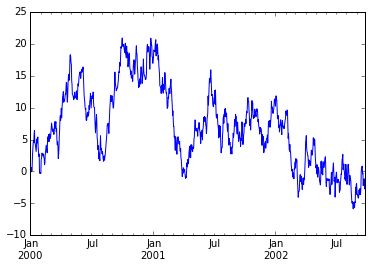

In [140]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [141]:
ts.head()

2000-01-01    0.622725
2000-01-02   -0.110632
2000-01-03    0.424814
2000-01-04    0.621362
2000-01-05    0.057714
Freq: D, dtype: float64

In [144]:
df = pd.DataFrame(np.random.randn(1000,4),
                  index=ts.index,
                  columns=['A','B','C','D'])
df.head()

,A,B,C,D
2000-01-01,0.711459,-1.963483,0.190836,-0.780893
2000-01-02,-0.395921,-0.690942,1.701146,0.605039
2000-01-03,0.907855,0.172455,2.136319,-1.260154
2000-01-04,-2.034323,0.380470,-0.792929,1.121225
2000-01-05,0.952985,0.728002,1.214687,0.753237


In [146]:
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,0.711459,-1.963483,0.190836,-0.780893
2000-01-02,1.026997,-4.617909,2.082817,-0.956747
2000-01-03,2.250390,-7.099880,6.111117,-2.392755
2000-01-04,1.439459,-9.201381,9.346489,-2.707539
2000-01-05,1.581514,-10.574880,13.796547,-2.269085


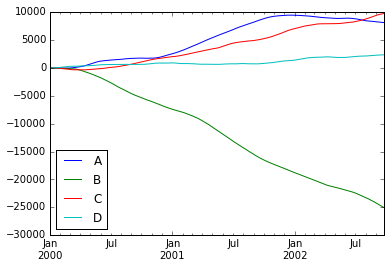

In [147]:
plt.figure()
df.plot()
plt.legend(loc='best')